## 1. Setup

We begin by importing the packages used in this notebook.

In [1]:
import cartopy.crs as ccrs
import earthaccess
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
#results = earthaccess.search_datasets(instrument="oci")

In [4]:
# for item in results:
#     summary = item.summary()
#     print(summary["short-name"])

In [5]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_MOANA",
    count=1,
)
len(results)

1

In [6]:
tspan = ("2024-03-01", "2025-08-04")
#bbox = (-76.75, 36.97, -75.74, 39.01)
#clouds = (0, 80)

In [7]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_MOANA",
    temporal=tspan,
    granule_name = "*.DAY.*0p1deg*",
    #cloud_cover=clouds,
)
len(results)

394

In [8]:
paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/394 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/394 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/394 [00:00<?, ?it/s]

In [9]:
dataset = xr.open_mfdataset(
    paths,
    combine="nested",
    concat_dim="date",
)
dataset

<xarray.Dataset> Size: 7GB
Dimensions:          (date: 394, lat: 1400, lon: 1100, rgb: 3,
                      eightbitcolor: 256)
Coordinates:
  * lat              (lat) float32 6kB 69.95 69.85 69.75 ... -69.85 -69.95
  * lon              (lon) float32 4kB -84.95 -84.85 -84.75 ... 24.85 24.95
Dimensions without coordinates: date, rgb, eightbitcolor
Data variables:
    prococcus_moana  (date, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    syncoccus_moana  (date, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    picoeuk_moana    (date, lat, lon) float32 2GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    palette          (date, rgb, eightbitcolor) uint8 303kB dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/62)
    product_name:                      PACE_OCI.20240305.L3m.DAY.MOANA.V3_0.0...
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    cdm_data_type:                     grid
    identifier_product_doi_authority:  http://dx.doi.org
    identifier_product_doi:            10.5067/PACE/OCI/L3M/MOANA/3.0
    data_bins:                         144444
    data_minimum:                      -inf
    data_maximum:                      inf

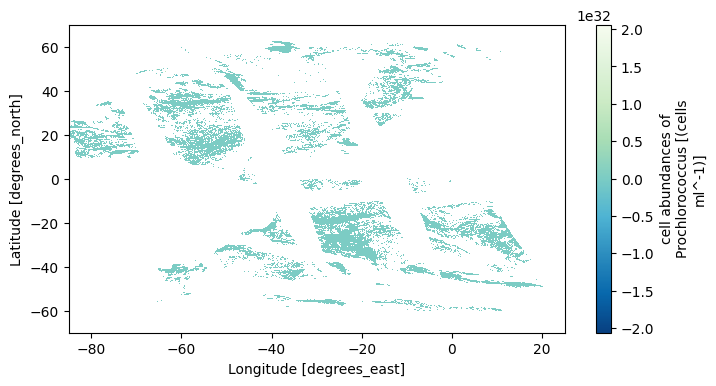

In [11]:
chla = (dataset["prococcus_moana"])
chla.attrs.update(
    {
        "units": f'({dataset["prococcus_moana"].attrs["units"]})',
    }
)
plot = chla.sel({"date": 0}).plot(aspect=2, size=4, cmap="GnBu_r")

... to a map of average values, skipping "NaN" values that result from clouds.

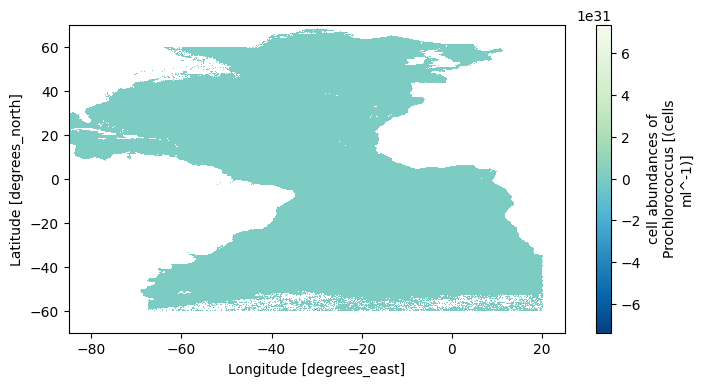

In [12]:
chla_avg = chla.mean("date", keep_attrs=True)
plot = chla_avg.plot(aspect=2, size=4, cmap="GnBu_r")

## 6. Download Data

Let's go ahead and download a couple granules.

Let's look at the `earthaccess.download` function, which is used
to copy files onto a filesystem local to the machine executing the
code. For this function, provide the output of
`earthaccess.search_data` along with a directory where `earthaccess` will store downloaded granules.

Even if you only want to read a slice of the data, and downloading
seems unncessary, if you use `earthaccess.open` while not running on a remote host with direct access to the NASA Earthdata Cloud,
performance will be very poor. This is not a problem with "the
cloud" or with `earthaccess`, it has to do with the data format and may soon be resolved.

In [22]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_BGC",
    temporal=tspan,
    bounding_box=bbox,
    cloud_cover=clouds,
)

The `paths` list now contains paths to actual files on the local
filesystem.

In [ ]:
#paths = earthaccess.download(results, local_path="data")
#paths

We can open up that locally saved file using `xarray` as well.

In [ ]:
#xr.open_datatree(paths[0])

[back to top](#Contents)